# Analysis of Indices

#### This notebook analyses the historic performance of countries indices and debunks myths about investing into ETFs

One of the greatest myths are, that if you invest in the NASDAQ / Dow Jones / S&P 500, you will certainly gain an 7% return per year. This might be true, but cherry-picking economies which thrived in the past 30 years is for a deeper understanding problematic, which we will see in course of this notebook.

At first, let us just observe how the 3 big indices of the US were doing in the past 30 years.

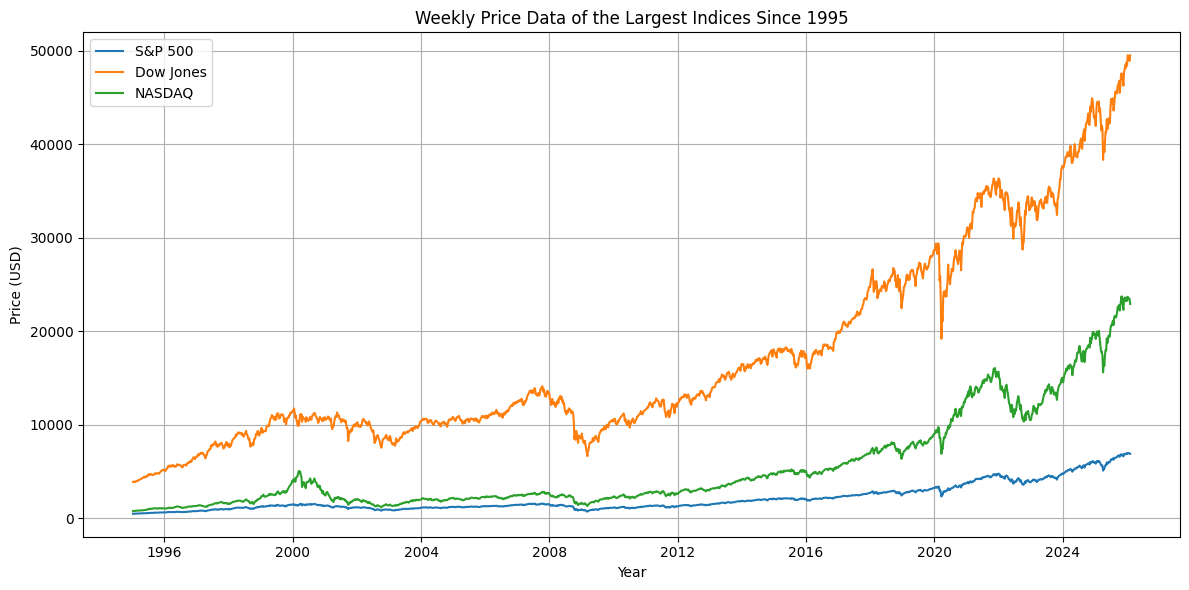

In [2]:
import yfinance as yf
import matplotlib
from matplotlib import pyplot as plt

# List of indices with Yahoo Finance ticker symbols
indices = {
    "S&P 500": "^GSPC",
    "Dow Jones": "^DJI",
    "NASDAQ": "^IXIC"
}

# Start and end date
start_date = "1995-01-01"
end_date = None  # None = until today

plt.figure(figsize=(12, 6))

for name, ticker in indices.items():
    # Load data from Yahoo Finance
    data = yf.download(ticker, start=start_date, auto_adjust=True, progress=False)
    weekly = data['Close'].resample("W").last()

    
    # Plot
    plt.plot(weekly.index, weekly, label=name)

plt.title("Weekly Price Data of the Largest Indices Since 1995")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Here, of course the Doow Jones is seemingly to do very well, but we have to let all 3 indices start at the same level.

Loading data for S&P 500 (USA) (^GSPC)...
Loading data for Dow Jones (USA) (^DJI)...
Loading data for NASDAQ Composite (USA) (^IXIC)...


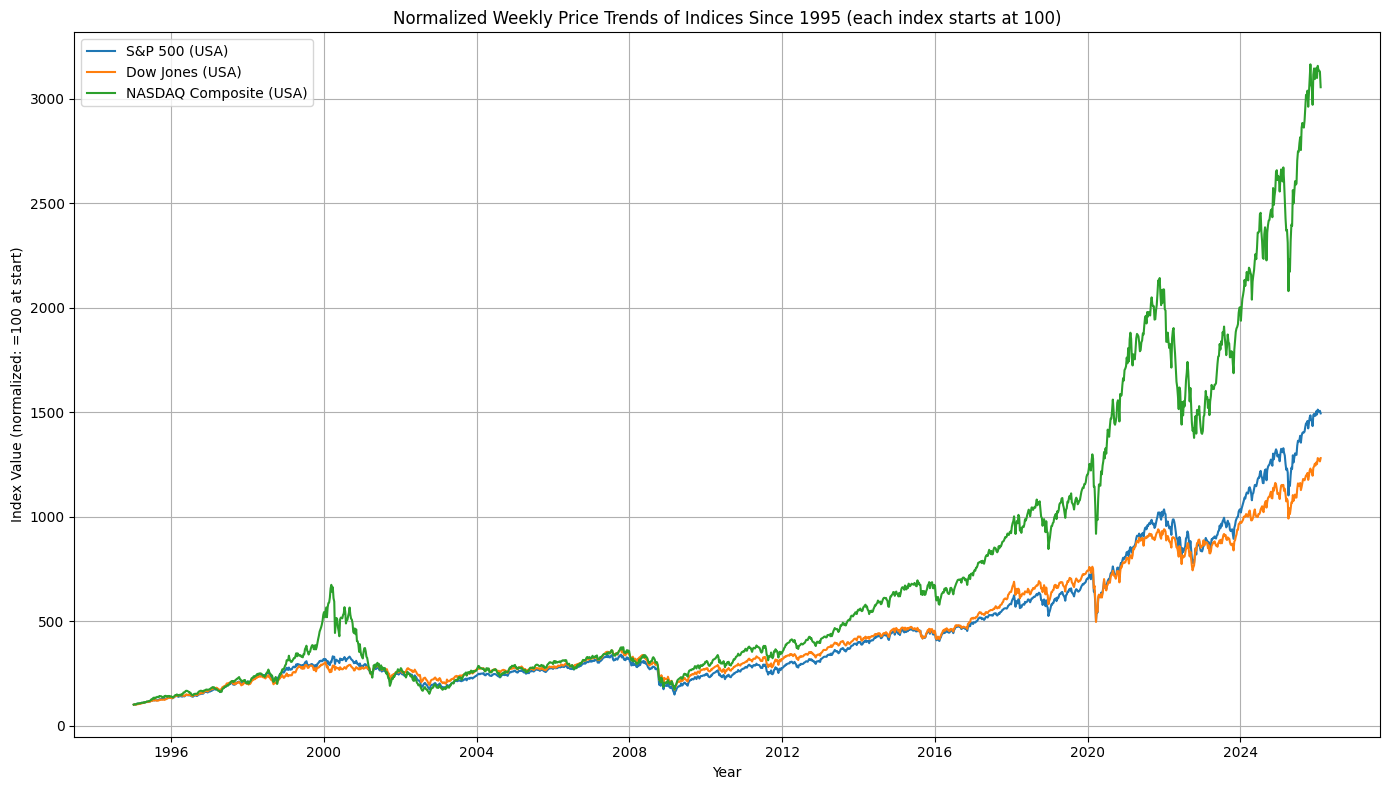

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Indices that have data since approx. 1995 (depending on index availability)
indices = {
    "S&P 500 (USA)": "^GSPC",
    "Dow Jones (USA)": "^DJI",
    "NASDAQ Composite (USA)": "^IXIC"
}

start_date = "1995-01-01"
# end_date can be None => until today
end_date = None

# Dict to store weekly and normalized data
weekly_normed = {}

plt.figure(figsize=(14, 8))

for name, ticker in indices.items():
    print(f"Loading data for {name} ({ticker})...")
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True, progress=False)
    if data.empty:
        print(f"  => No data found for {name}, skipping.")
        continue
    # Weekly closing prices
    weekly = data['Close'].resample("W").last().dropna()
    if weekly.empty:
        print(f"  => No weekly closing prices for {name}, skipping.")
        continue
    # Normalization: first available weekly value = 100
    first = weekly.iloc[0]
    normed = (weekly / first) * 100
    weekly_normed[name] = normed

# Plot
for name, normed in weekly_normed.items():
    plt.plot(normed.index, normed, label=name)

plt.title("Normalized Weekly Price Trends of Indices Since 1995 (each index starts at 100)")
plt.xlabel("Year")
plt.ylabel("Index Value (normalized: =100 at start)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Here, is becomes obvious, that the NASDAQ outperformed every other indices by a landslide. Let's compare these US indices with other big economies like Japan, France, Germany and China.

Loading data for S&P 500 (USA) (^GSPC)...
Loading data for Dow Jones (USA) (^DJI)...
Loading data for NASDAQ Composite (USA) (^IXIC)...
Loading data for Nikkei 225 (Japan) (^N225)...
Loading data for FTSE 100 (UK) (^FTSE)...
Loading data for DAX (Germany) (^GDAXI)...
Loading data for Shanghai Composite (China) (000001.SS)...


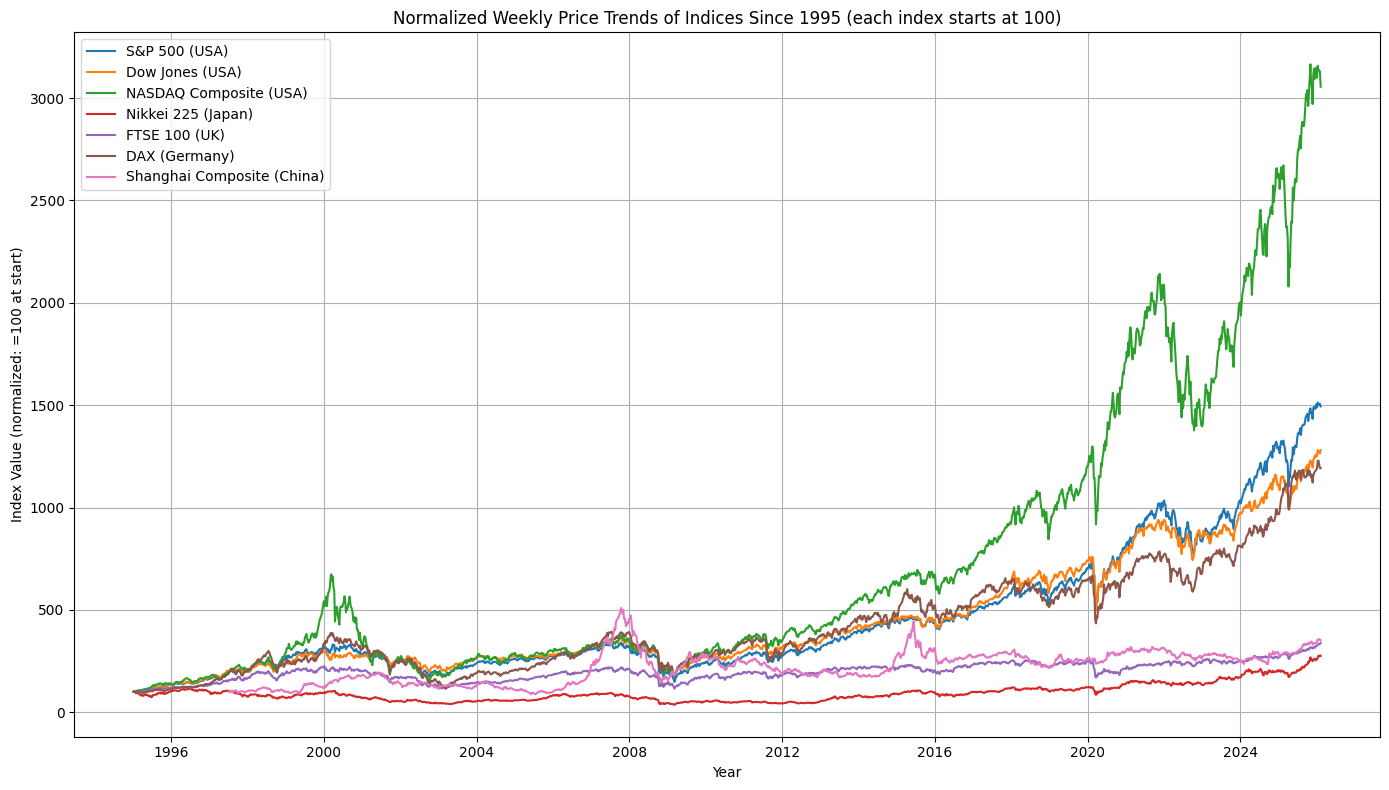

In [ ]:
# Indices with Yahoo Finance ticker symbols
indices = {
    "S&P 500 (USA)": "^GSPC",
    "Dow Jones (USA)": "^DJI",
    "NASDAQ Composite (USA)": "^IXIC",
    "Nikkei 225 (Japan)": "^N225",
    "FTSE 100 (UK)": "^FTSE",
    "DAX (Germany)": "^GDAXI",
    "Shanghai Composite (China)": "000001.SS"
}

start_date = "1995-01-01"
end_date = None  # None = until today

# Dictionary for normalized data
weekly_normed = {}

plt.figure(figsize=(14, 8))

for name, ticker in indices.items():
    print(f"Loading data for {name} ({ticker})...")
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True, progress=False)
    if data.empty:
        print(f"  => No data found for {name}, skipping.")
        continue
    # Weekly closing prices
    weekly = data['Close'].resample("W").last().dropna()
    if weekly.empty:
        print(f"  => No weekly closing prices for {name}, skipping.")
        continue
    # Normalization: first available weekly value = 100
    first = weekly.iloc[0]
    normed = (weekly / first) * 100
    weekly_normed[name] = normed

# Plot
for name, normed in weekly_normed.items():
    plt.plot(normed.index, normed, label=name)

plt.title("Normalized Weekly Price Trends of Indices Since 1995 (each index starts at 100)")
plt.xlabel("Year")
plt.ylabel("Index Value (normalized: =100 at start)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Still, NASDAQ is the winner overall, despite the economic boom of China in the last 30 years. Since grows happens exponentially, instead of looking at these in a linear axis, lets plot it on a logarithmic axis.

Loading data for S&P 500 (USA) (^GSPC)...
Loading data for Dow Jones (USA) (^DJI)...
Loading data for NASDAQ Composite (USA) (^IXIC)...
Loading data for Nikkei 225 (Japan) (^N225)...
Loading data for FTSE 100 (UK) (^FTSE)...
Loading data for DAX (Germany) (^GDAXI)...
Loading data for Shanghai Composite (China) (000001.SS)...
Loading data for CAC 40 (France) (^FCHI)...
Loading data for MSCI World Index (^990100-USD-STRD)...


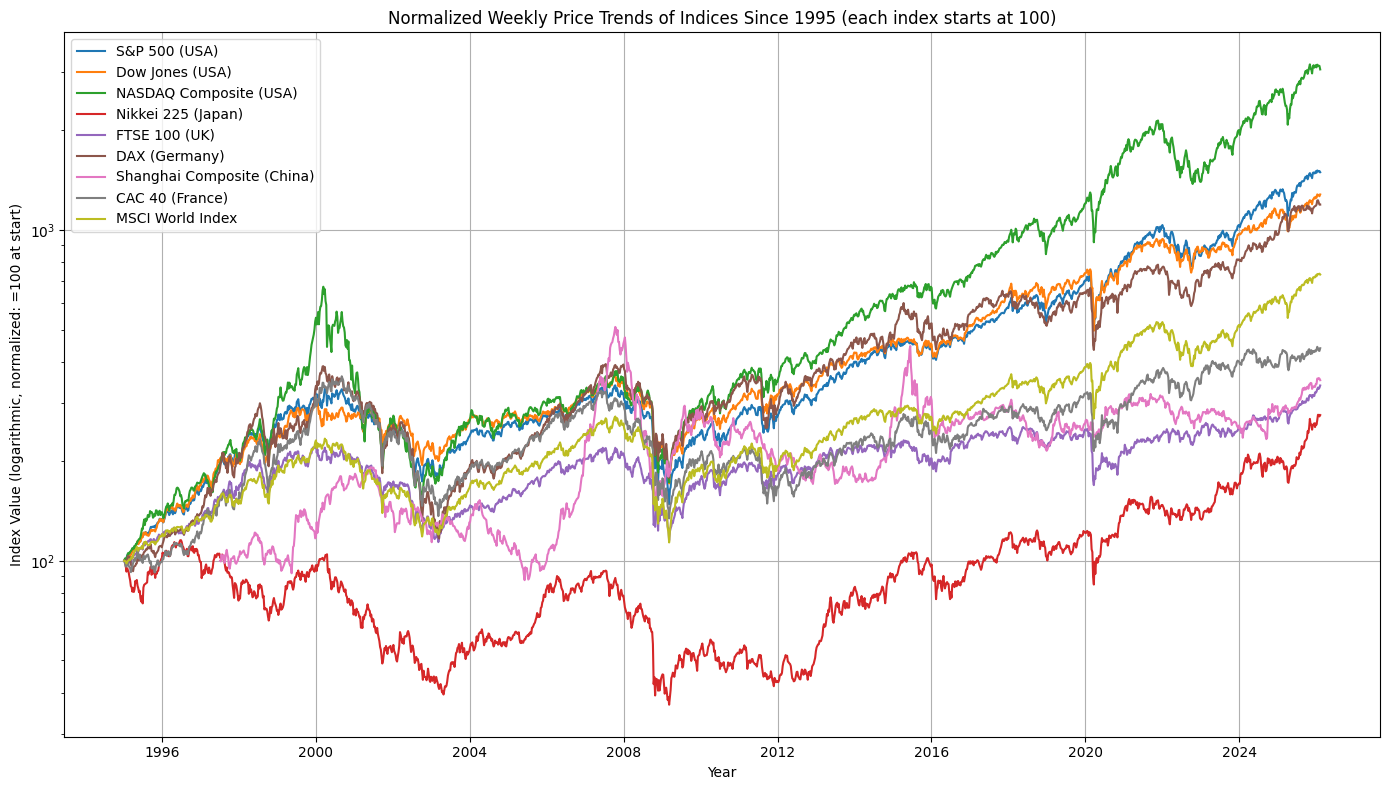

In [ ]:
# Indices with Yahoo Finance ticker symbols
indices = {
    "S&P 500 (USA)": "^GSPC",
    "Dow Jones (USA)": "^DJI",
    "NASDAQ Composite (USA)": "^IXIC",
    "Nikkei 225 (Japan)": "^N225",
    "FTSE 100 (UK)": "^FTSE",
    "DAX (Germany)": "^GDAXI",
    "Shanghai Composite (China)": "000001.SS",
    "CAC 40 (France)": "^FCHI",
    "MSCI World Index": "^990100-USD-STRD"
}

start_date = "1995-01-01"
end_date = None  # None = until today

# Dictionary for normalized data
weekly_normed = {}

plt.figure(figsize=(14, 8))

for name, ticker in indices.items():
    print(f"Loading data for {name} ({ticker})...")
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True, progress=False)
    if data.empty:
        print(f"  => No data found for {name}, skipping.")
        continue
    # Weekly closing prices
    weekly = data['Close'].resample("W").last().dropna()
    if weekly.empty:
        print(f"  => No weekly closing prices for {name}, skipping.")
        continue
    # Normalization: first available weekly value = 100
    first = weekly.iloc[0]
    normed = (weekly / first) * 100
    weekly_normed[name] = normed

# Plot
for name, normed in weekly_normed.items():
    plt.plot(normed.index, normed, label=name)

plt.title("Normalized Weekly Price Trends of Indices Since 1995 (each index starts at 100)")
plt.xlabel("Year")
plt.ylabel("Index Value (logarithmic, normalized: =100 at start)")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Now this becomes much more interesting! We can see that Japan's index Nikkei had a horrendous performance in the last 30 years (partially due to its economic crash in the 2000s and the economic decline of the following years), while Chinas index seems to not perform well in comparison to its economic growth overall. Quite funny!
So let's examine the correlation between the economic performance if a country to the performance ot it's indices. We'll plot the phases of economic recession in the graph.
Let's also add the MSCI world (which to a big portion consists of US and European companies, so to be honest not that "international") and some more indices.

Loading data for S&P 500 (USA) (^GSPC)...
Loading data for Dow Jones (USA) (^DJI)...
Loading data for NASDAQ Composite (USA) (^IXIC)...
Loading data for Nikkei 225 (Japan) (^N225)...
Loading data for FTSE 100 (UK) (^FTSE)...
Loading data for DAX (Germany) (^GDAXI)...
Loading data for Shanghai Composite (China) (000001.SS)...
Loading data for CAC 40 (France) (^FCHI)...
Loading data for MSCI World Index (^990100-USD-STRD)...


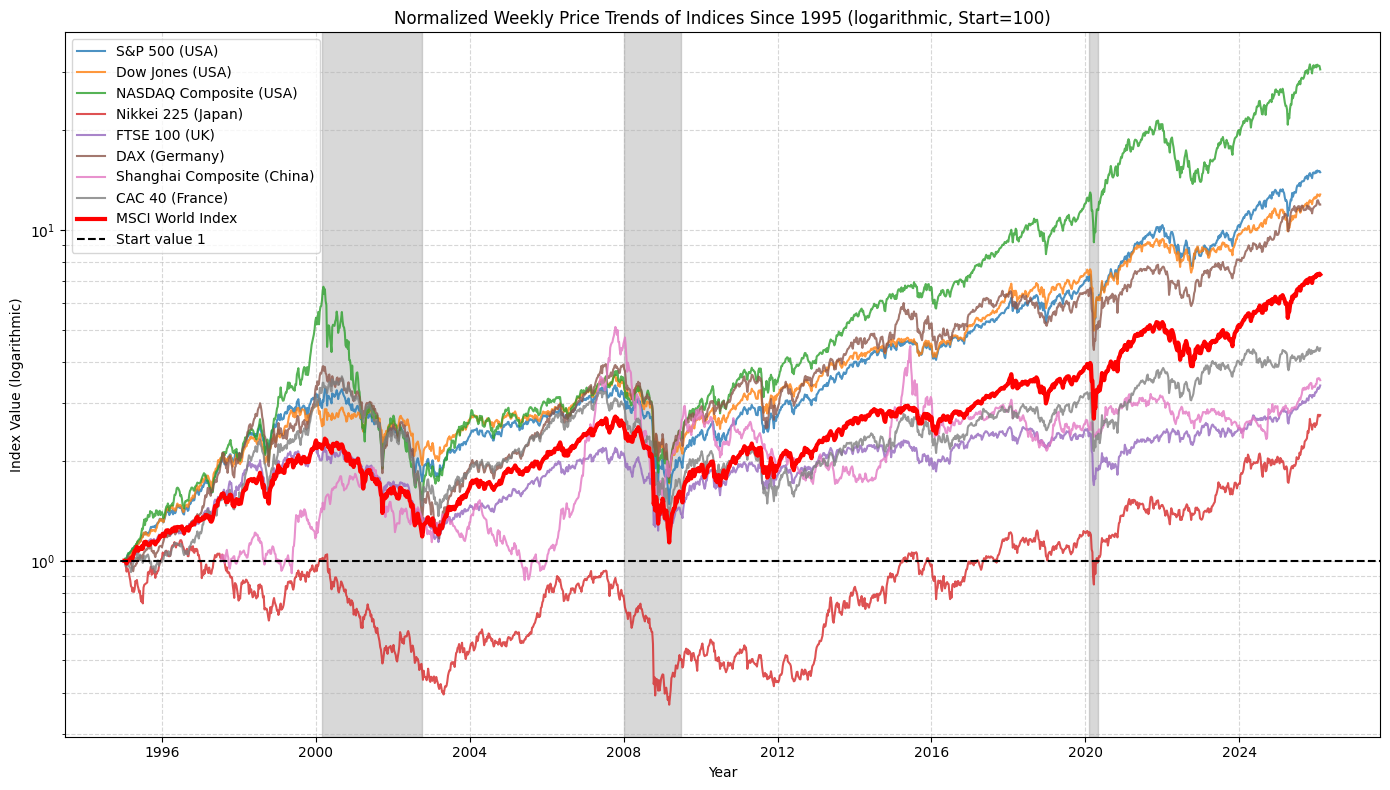

In [ ]:
# Indices with Yahoo Finance ticker symbols
indices = {
    "S&P 500 (USA)": "^GSPC",
    "Dow Jones (USA)": "^DJI",
    "NASDAQ Composite (USA)": "^IXIC",
    "Nikkei 225 (Japan)": "^N225",
    "FTSE 100 (UK)": "^FTSE",
    "DAX (Germany)": "^GDAXI",
    "Shanghai Composite (China)": "000001.SS",
    "CAC 40 (France)": "^FCHI",
    "MSCI World Index": "^990100-USD-STRD"
}

start_date = "1995-01-01"
end_date = None  # until today

weekly_normed = {}

plt.figure(figsize=(14, 8))

for name, ticker in indices.items():
    print(f"Loading data for {name} ({ticker})...")
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True, progress=False)
    if data.empty:
        print(f"  => No data found for {name}, skipping.")
        continue
    weekly = data['Close'].resample("W").last().dropna()
    if weekly.empty:
        print(f"  => No weekly closing prices for {name}, skipping.")
        continue
    first = weekly.iloc[0]
    normed = (weekly / first) * 1
    weekly_normed[name] = normed

# Plot recession periods (shaded in gray)
recessions = [
    ("2000-03-01", "2002-10-01"),  # Dotcom crash
    ("2008-01-01", "2009-06-30"),  # Financial crisis
    ("2020-02-01", "2020-04-30"),  # COVID-19 crash
]

for start, end in recessions:
    plt.yscale("log", base=2)
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='grey', alpha=0.3)

# Plot
for name, normed in weekly_normed.items():
    if "MSCI World" in name:
        plt.plot(normed.index, normed, label=name, linewidth=3, color="red")  # Highlight
    else:
        plt.plot(normed.index, normed, label=name, linewidth=1.5, alpha=0.8)


# Horizontal line at 1 (starting point of all indices)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1.5, label='Start value 1')

plt.title("Normalized Weekly Price Trends of Indices Since 1995 (logarithmic, Start=100)")
plt.xlabel("Year")
plt.ylabel("Index Value (logarithmic)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Okay, so there seems to be a strong link between economic performance and indices, right? (except for China, which does its own weird stuff) Lets compare Real-GDP-growth to index-growth: We will highlight phases of GDP-decline/growth, so in times of GDP growth, indices should go up and vice versa, right?
Feel free to adjust the GDP_THRESHOLD and try different countries to gain a deeper understanding.

Loading data for S&P 500...
Loading data for DAX...
Loading data for Nikkei 225...


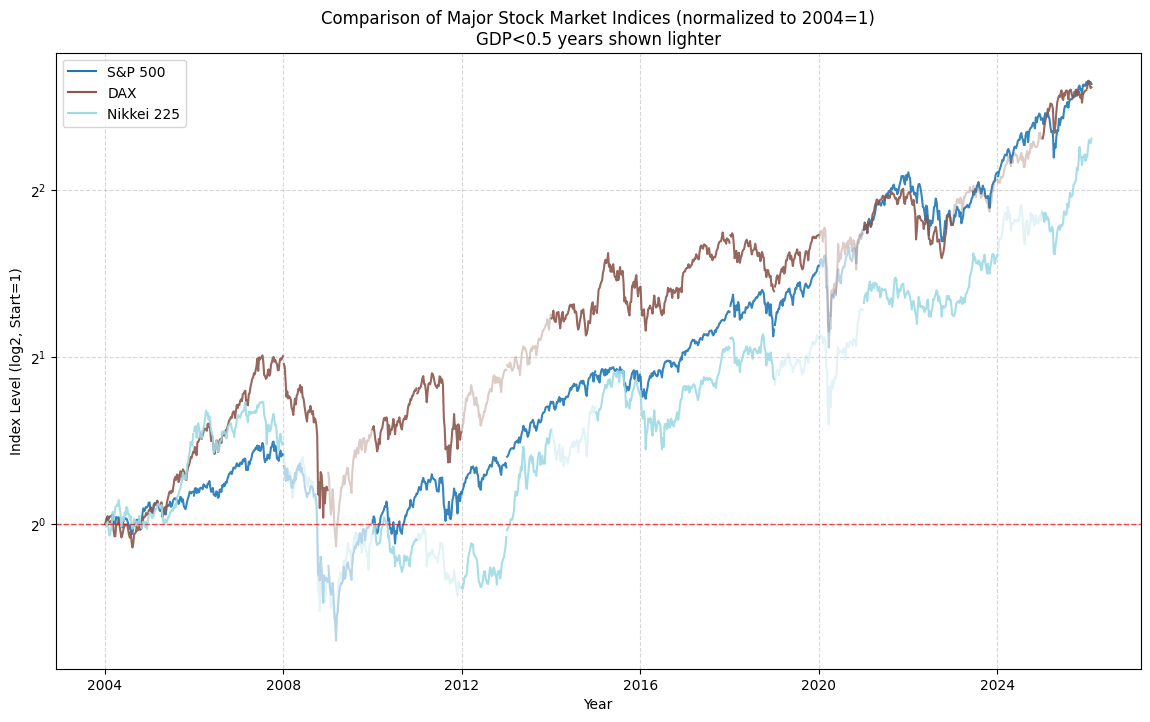

In [16]:
START_DATE=2004
GDP_THRESHOLD=0.5

import yfinance as yf
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.cm as cm

# Indices linked with countries (ISO codes for World Bank)
indices = {
    "S&P 500": {"ticker": "^GSPC", "country": "USA"},
    # "AEX": {"ticker": "^AEX", "country": "NLD"},
    "DAX": {"ticker": "^GDAXI", "country": "DEU"},
    # "SSMI": {"ticker": "^SSMI", "country": "CHE"},
    "Nikkei 225": {"ticker": "^N225", "country": "JPN"},
    #"FTSE 100": {"ticker": "^FTSE", "country": "GBR"},
    #"CAC 40": {"ticker": "^FCHI", "country": "FRA"},
    #"Hang Seng": {"ticker": "^HSI", "country": "HKG"},
    #"Shanghai Composite": {"ticker": "000001.SS", "country": "CHN"},
    #"BSE Sensex": {"ticker": "^BSESN", "country": "IND"},
    #"Bovespa": {"ticker": "^BVSP", "country": "BRA"},
    #"KOSPI": {"ticker": "^KS11", "country": "KOR"},
    #"ASX 200": {"ticker": "^AXJO", "country": "AUS"},
    #"MSCI World": {"ticker": "^W1DOW", "country": None}  # World index
}

start_date = f"{START_DATE}-01-01"
end_date = datetime.datetime.today().strftime("%Y-%m-%d")

# World Bank Indicator: real GDP growth (%)
indicator = {"NY.GDP.MKTP.KD.ZG": "gdp_growth"}

# Color palette (fixed colors for all indices)
colors = cm.tab20(np.linspace(0, 1, len(indices)))
color_map = {name: colors[i] for i, name in enumerate(indices.keys())}

plt.figure(figsize=(14, 8))

for name, info in indices.items():
    print(f"Loading data for {name}...")

    # Load stock market data
    data = yf.download(info["ticker"], start=start_date, end=end_date, progress=False)
    if data.empty:
        print(f"⚠️ No data available for {name}.")
        continue

    weekly = data["Close"].resample("W").last().dropna()

    # Check if index already has data for START_DATE
    if weekly.index[0].year > START_DATE:
        print(f"⚠️ {name} starts only in {weekly.index[0].year}, will be skipped.")
        continue

    # Normalization to 1 in year START_DATE
    weekly = weekly / weekly.iloc[0] * 1

    # Load GDP data (if country available)
    if info["country"]:
        gdp = wbdata.get_dataframe(indicator, country=info["country"])
        gdp = gdp.sort_index()
        gdp.index = pd.to_datetime(gdp.index).year  # Annual values
    else:
        gdp = None

    # Draw line piecewise (recession years lighter)
    years = weekly.index.year.unique()
    for year in years:
        segment = weekly[weekly.index.year == year]
        if len(segment) == 0:
            continue

        base_color = color_map[name]

        if gdp is not None and year in gdp.index:
            if gdp.loc[year, "gdp_growth"] < GDP_THRESHOLD:  # Recession
                plt.plot(segment.index, segment, color=base_color, alpha=0.3, label="_nolegend_")
            else:
                plt.plot(segment.index, segment, color=base_color, alpha=0.9, label="_nolegend_")
        else:
            plt.plot(segment.index, segment, color=base_color, alpha=0.9, label="_nolegend_")

    # Dummy for legend
    if name == "MSCI World":
        plt.plot([], [], color="black", linewidth=2.5, label="MSCI World")
    else:
        plt.plot([], [], color=color_map[name], label=name)

# Line at 1
plt.axhline(1, color="red", linestyle="--", linewidth=1, alpha=0.7)

plt.yscale("log", base=2)
plt.title(f"Comparison of Major Stock Market Indices (normalized to {START_DATE}=1)\nGDP<{GDP_THRESHOLD} years shown lighter")
plt.xlabel("Year")
plt.ylabel("Index Level (log2, Start=1)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.show()


Hm, not quite, what we expected, right? Let's further analyse: Now we compare real GDP-growth to annual indices-growth. Let's start with the Dow Jones for the US.

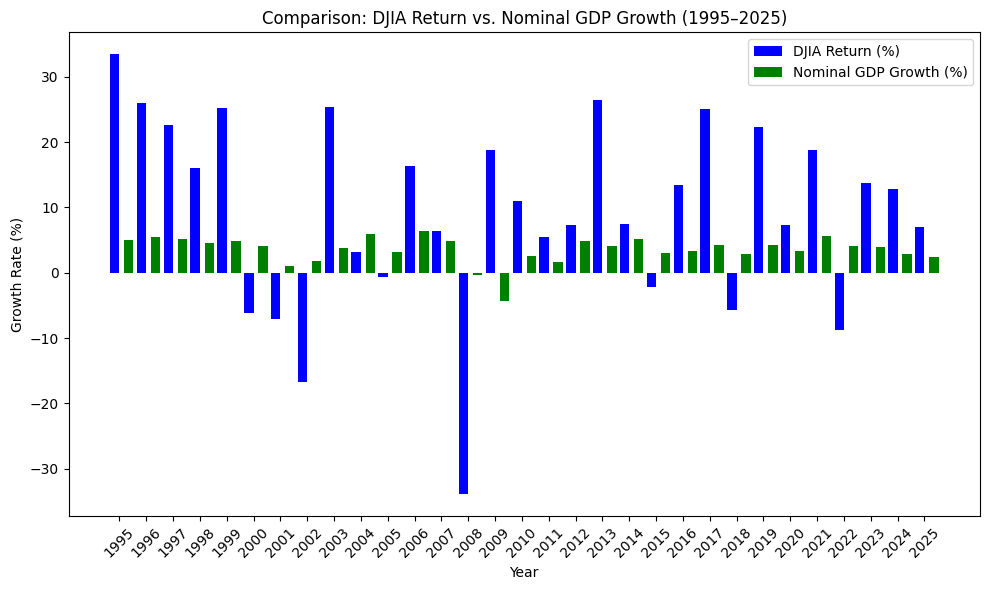

In [ ]:

# Data: Year, DJIA Return (%), Nominal GDP Growth (%)
data = [
    (1995, 33.45, 5.0), (1996, 26.01, 5.4), (1997, 22.64, 5.2), (1998, 16.10, 4.5),
    (1999, 25.22, 4.8), (2000, -6.17, 4.1), (2001, -7.10, 1.0), (2002, -16.76, 1.8),
    (2003, 25.32, 3.8), (2004, 3.15, 6.0), (2005, -0.61, 3.2), (2006, 16.29, 6.4),
    (2007, 6.43, 4.9), (2008, -33.84, -0.3), (2009, 18.82, -4.3), (2010, 11.02, 2.6),
    (2011, 5.53, 1.6), (2012, 7.26, 4.8), (2013, 26.50, 4.1), (2014, 7.52, 5.2),
    (2015, -2.23, 3.1), (2016, 13.42, 3.4), (2017, 25.08, 4.2), (2018, -5.63, 2.9),
    (2019, 22.34, 4.3), (2020, 7.25, 3.4), (2021, 18.73, 5.7), (2022, -8.78, 4.1),
    (2023, 13.70, 3.9), (2024, 12.88, 2.8), (2025, 6.93, 2.4)
]

# Separate the data into individual lists
years, djia_returns, gdp_growth = zip(*data)

# Create the chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Width of the bars

# Position of the bars on the x-axis
x = range(len(years))

# Create bars for DJIA and GDP growth
ax.bar(x, djia_returns, width, label='DJIA Return (%)', color='b', align='center')
ax.bar([p + width for p in x], gdp_growth, width, label='Nominal GDP Growth (%)', color='g', align='edge')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Growth Rate (%)')
ax.set_title('Comparison: DJIA Return vs. Nominal GDP Growth (1995–2025)')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(years, rotation=45)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


Okay, the Dow Jones seems to be overly dramatic, right? So there seems to be a light correlation, but not as we expect, for example when you see the years 1999, 2000, 2001 (Dotcom) or 2018 to just name a few.
Let's do the same with Germany.

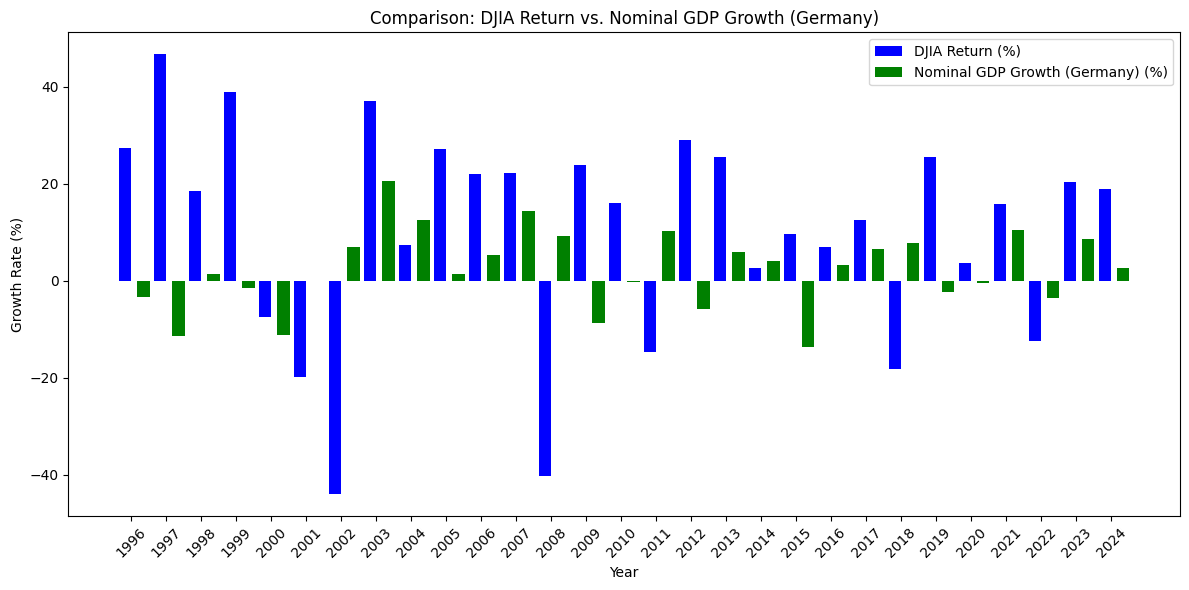

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import requests
from datetime import datetime

# Leading indices per country
INDEXES = {
    'USA': '^DJI',  # Dow Jones Industrial Average
    'DEU': '^GDAXI',  # DAX Index
    'CHN': '000001.SS',  # Shanghai Composite Index
    # More countries and their leading indices can be added here
}

# Function to retrieve the leading index
def get_leading_index(country_code):
    return INDEXES.get(country_code, None)

# Function to retrieve annual returns of the leading index
def get_index_annual_returns(index_symbol, start_year, end_year):
    index = yf.Ticker(index_symbol)
    data = index.history(start=f"{start_year}-01-01", end=f"{end_year}-12-31")
    data['Year'] = data.index.year
    annual_returns = data.groupby('Year')['Close'].last().pct_change().dropna() * 100
    return annual_returns

# Function to retrieve nominal GDP growth of a country
def get_gdp_growth(country_code, start_year, end_year):
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/NY.GDP.MKTP.CD?date={start_year}:{end_year}&format=json"
    response = requests.get(url)
    data = response.json()
    gdp = {int(item['date']): item['value'] for item in data[1] if item['value'] is not None}
    gdp_growth = {}
    sorted_years = sorted(gdp.keys())
    for i in range(1, len(sorted_years)):
        y = sorted_years[i]
        prev = sorted_years[i-1]
        gdp_growth[y] = ((gdp[y] - gdp[prev]) / gdp[prev]) * 100
    return gdp_growth

# Function to plot the comparison
def plot_comparison(djia_growth, gdp_growth, country_name):
    years = sorted(set(djia_growth.index).intersection(gdp_growth.keys()))
    djia_values = [djia_growth[year] for year in years]
    gdp_values = [gdp_growth[year] for year in years]

    x = range(len(years))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(x, djia_values, width, label='DJIA Return (%)', color='b', align='center')
    ax.bar([p + width for p in x], gdp_values, width, label=f'Nominal GDP Growth ({country_name}) (%)', color='g', align='edge')

    ax.set_xlabel('Year')
    ax.set_ylabel('Growth Rate (%)')
    ax.set_title(f'Comparison: DJIA Return vs. Nominal GDP Growth ({country_name})')
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(years, rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Main function
def main():
    country_code = 'DEU'  # Example: 'DEU' for Germany
    country_name = 'Germany'
    start_year = 1995
    end_year = datetime.now().year

    index_symbol = get_leading_index(country_code)
    if index_symbol:
        djia_growth = get_index_annual_returns(index_symbol, start_year, end_year)
        gdp_growth = get_gdp_growth(country_code, start_year, end_year)
        plot_comparison(djia_growth, gdp_growth, country_name)
    else:
        print(f"No leading index found for the country with code {country_code}.")

if __name__ == "__main__":
    main()


This correlation is even worse! So whats going on?

### Economic theory and equality

Okay, there might be an explaination: The indices only include the largest few companies, meaning only the assets of the richest people are included. What is displayed on the index might only be the *espectation of performance* (keep that in mind) of the assets of the rich. Thus, maybe if we need to check, if the indices match more the "GDP-performance of the top 1%" of a countries economy. This also makes sense, since the top 1% have much more money to invest.
So let's get data from 4 interesting candidates:
- USA (biggest economy with a comparatively free market)
- Germany (high generational wealth, but also high taxes and decent social security)
- Japan (interesting to see comparison because of the economic "decline")
- Denmark (a flagship in social equality and security)

The data is from the "World Inequality Database"

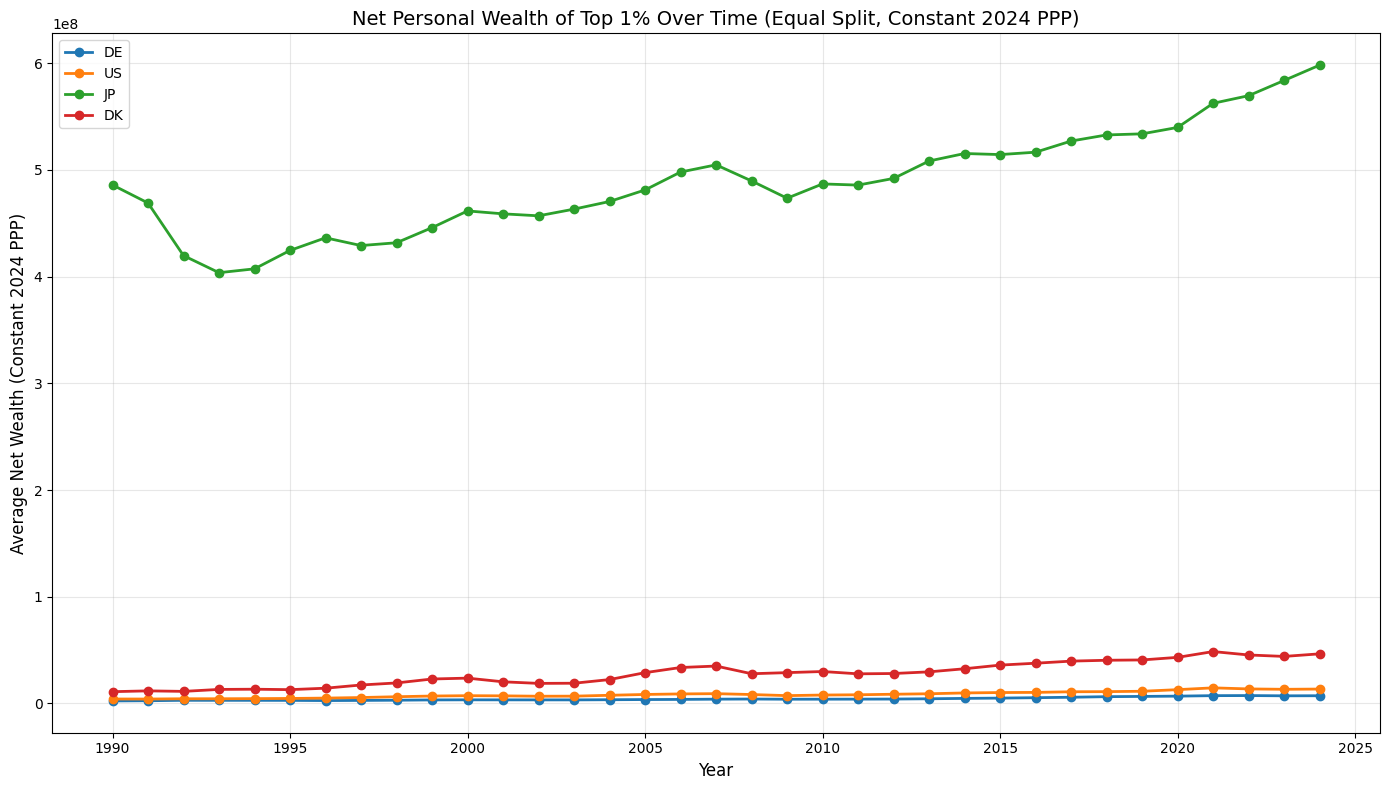

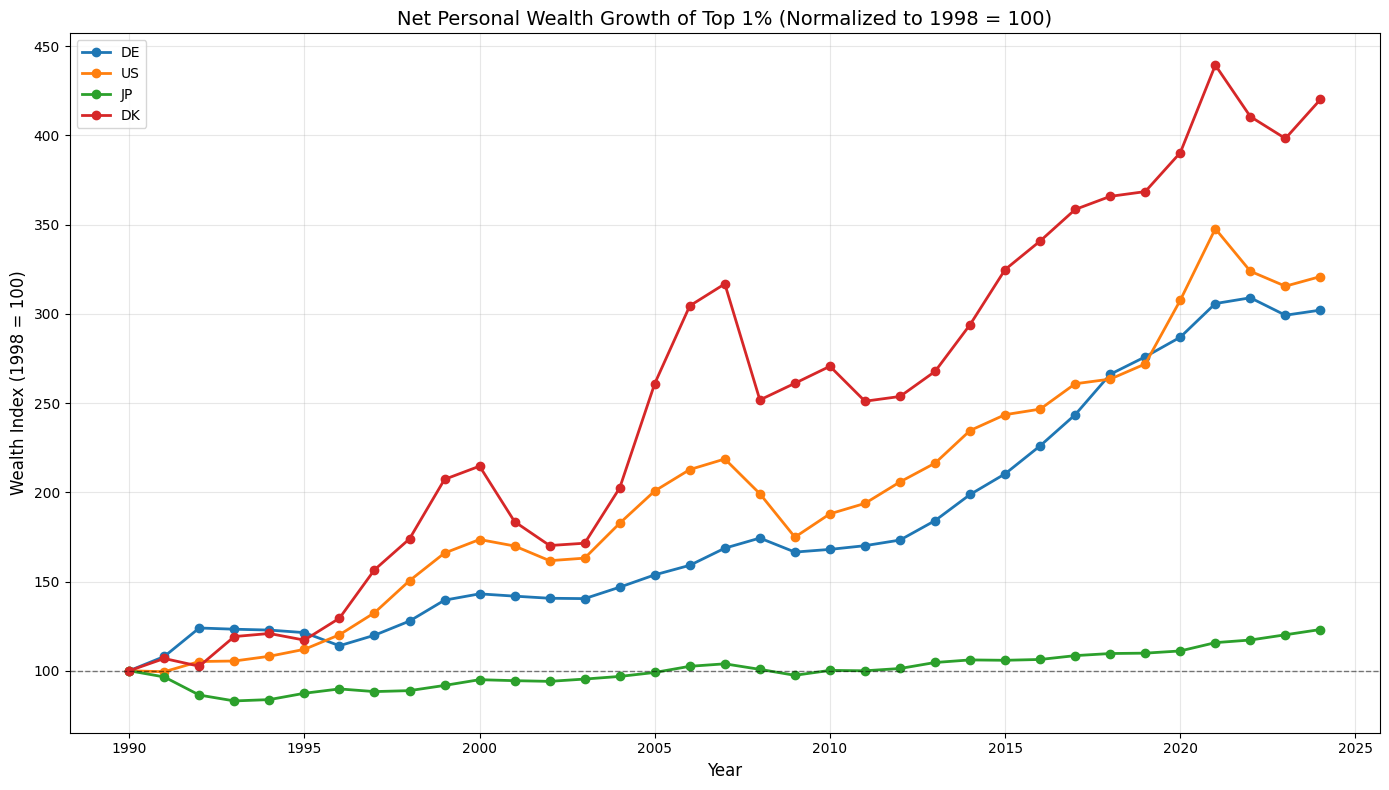

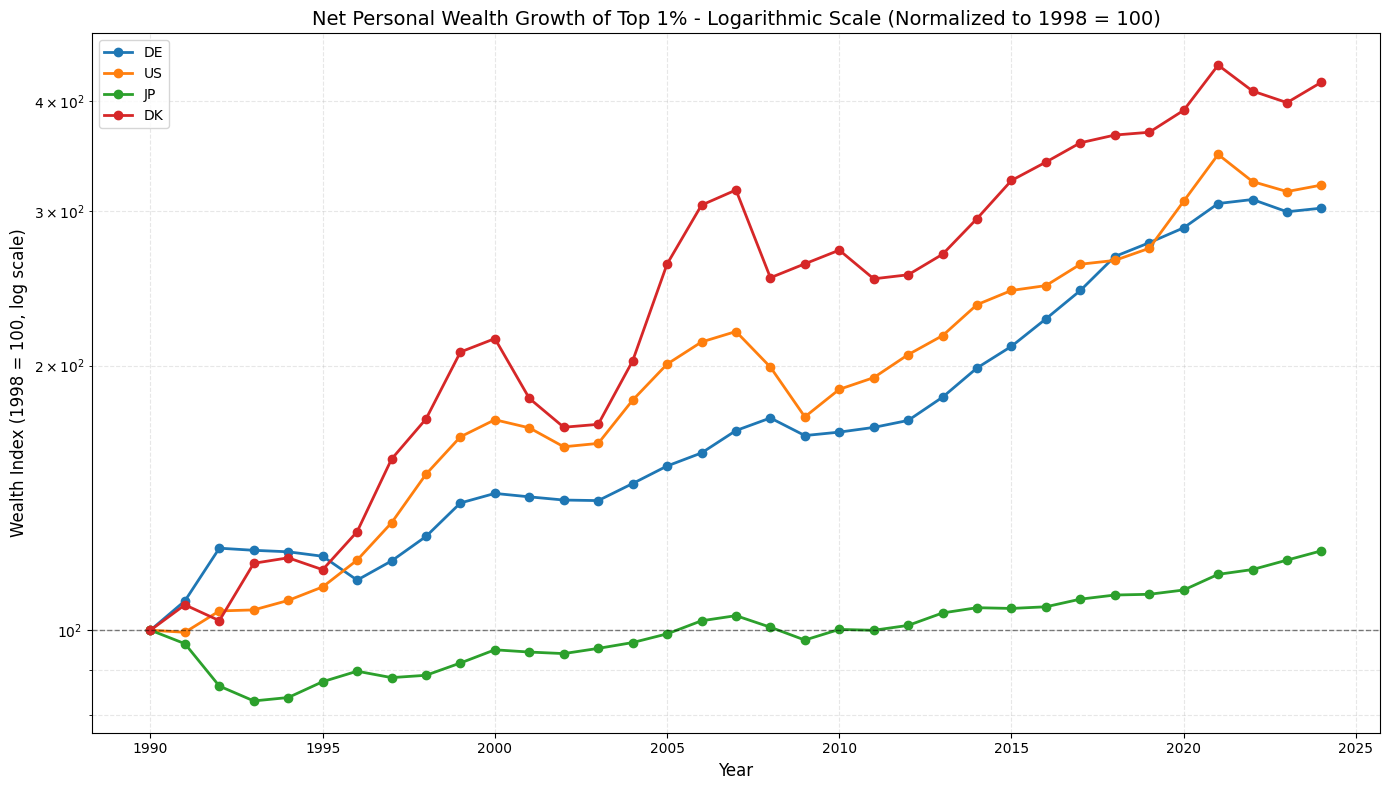

In [20]:
# Read the CSV file with semicolon delimiter
df = pd.read_csv('WID_Data_05022026-131633.csv', sep=';', skiprows=1)

# Clean column names by extracting country codes
columns_to_plot = {}
for col in df.columns:
    if 'ahweal_999_j_' in col:  # Equal split data
        # Extract country code
        country = col.split('_')[-1].split('\n')[0]
        columns_to_plot[col] = country

# Create the plot
plt.figure(figsize=(14, 8))

for col, country in columns_to_plot.items():
    # Plot only if data is available
    if col in df.columns:
        # Remove NaN values
        data_to_plot = df[['Year ', col]].dropna()
        plt.plot(data_to_plot['Year '], data_to_plot[col], marker='o', label=country, linewidth=2)

plt.title('Net Personal Wealth of Top 1% Over Time (Equal Split, Constant 2024 PPP)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Net Wealth (Constant 2024 PPP)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Also create a normalized version (starting at 1998 = 100)
plt.figure(figsize=(14, 8))

for col, country in columns_to_plot.items():
    if col in df.columns:
        data_to_plot = df[['Year ', col]].dropna()
        if len(data_to_plot) > 0:
            # Normalize to first year = 100
            first_value = data_to_plot[col].iloc[0]
            normalized = (data_to_plot[col] / first_value) * 100
            plt.plot(data_to_plot['Year '], normalized, marker='o', label=country, linewidth=2)

plt.title('Net Personal Wealth Growth of Top 1% (Normalized to 1998 = 100)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wealth Index (1998 = 100)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.axhline(y=100, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.tight_layout()
plt.show()

# Create a logarithmic version for better comparison of growth rates
plt.figure(figsize=(14, 8))

for col, country in columns_to_plot.items():
    if col in df.columns:
        data_to_plot = df[['Year ', col]].dropna()
        if len(data_to_plot) > 0:
            # Normalize to first year = 100
            first_value = data_to_plot[col].iloc[0]
            normalized = (data_to_plot[col] / first_value) * 100
            plt.plot(data_to_plot['Year '], normalized, marker='o', label=country, linewidth=2)

plt.title('Net Personal Wealth Growth of Top 1% - Logarithmic Scale (Normalized to 1998 = 100)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wealth Index (1998 = 100, log scale)', fontsize=12)
plt.yscale('log')
plt.legend(fontsize=10)
plt.grid(True, which='both', alpha=0.3, linestyle='--')
plt.axhline(y=100, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.tight_layout()
plt.show()


Interesting! So first of all, why is the personal net worth of Japan so high?

Second of all, we can see, that Japanese top 1% had the lowest growth over the last 25 years of the 4 countries. We can also see, that although not as sensitive economic recession, it does go down in the face of great recessions like 2007/2008 and the corona-pandemic.

Paradoxically, Denmark as one of the wealthiest countries but also a country, which is known for it's social security and high taxes saw the highest growth of personal net wealth of the top 1% overall.

Loading index data for USA (^GSPC)...
Loading index data for Germany (^GDAXI)...
Loading index data for Japan (^N225)...
Loading index data for Denmark (^OMXC25)...


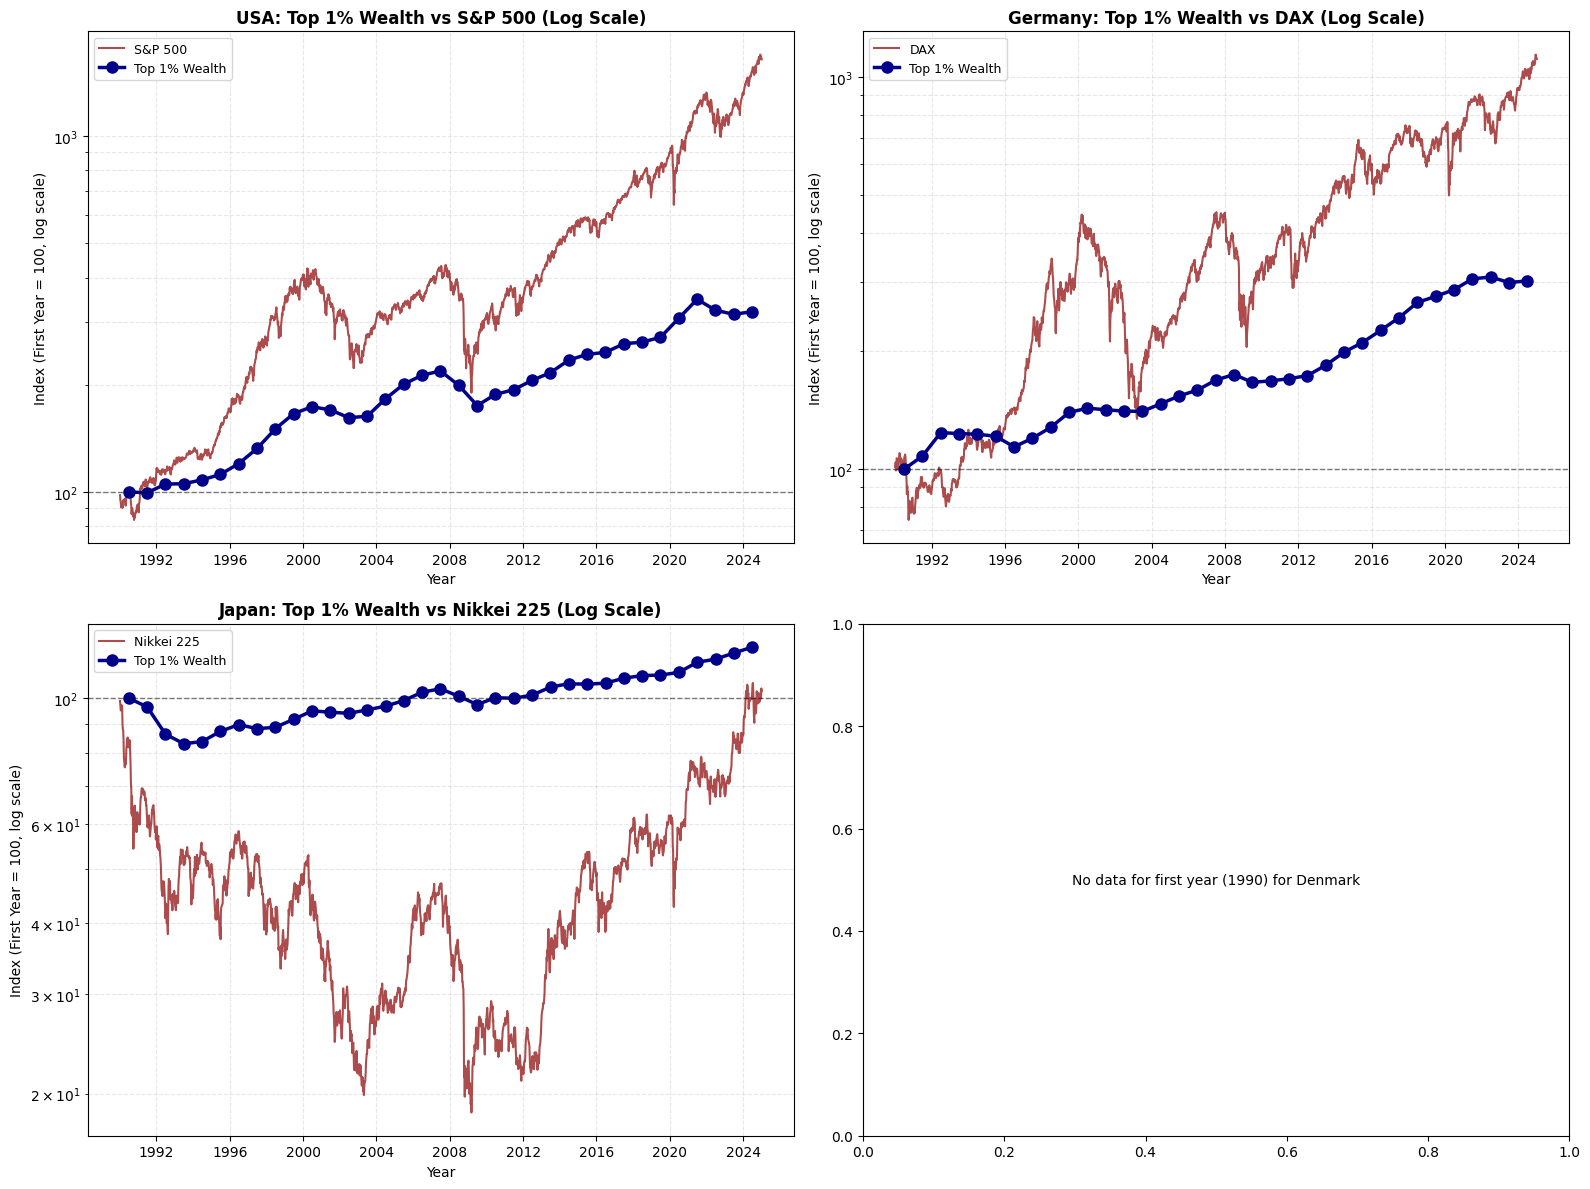

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Read the wealth data
df_wealth = pd.read_csv('WID_Data_05022026-131633.csv', sep=';', skiprows=1)

# Country mappings
countries = {
    'US': {
        'code': 'US',
        'name': 'USA',
        'index': '^GSPC',  # S&P 500
        'index_name': 'S&P 500'
    },
    'DE': {
        'code': 'DE',
        'name': 'Germany',
        'index': '^GDAXI',  # DAX
        'index_name': 'DAX'
    },
    'JP': {
        'code': 'JP',
        'name': 'Japan',
        'index': '^N225',  # Nikkei 225
        'index_name': 'Nikkei 225'
    },
    'DK': {
        'code': 'DK',
        'name': 'Denmark',
        'index': '^OMXC25',  # OMX Copenhagen 25
        'index_name': 'OMX Copenhagen 25'
    }
}

# Create logarithmic scale subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (country_key, country_info) in enumerate(countries.items()):
    ax = axes[idx]
    
    # Find the wealth column for this country
    wealth_col = None
    for col in df_wealth.columns:
        if f'ahweal_999_j_{country_info["code"]}' in col:
            wealth_col = col
            break
    
    if wealth_col is None:
        print(f"No wealth data found for {country_info['name']}")
        continue
    
    # Get wealth data
    wealth_data = df_wealth[['Year ', wealth_col]].dropna()
    wealth_data = wealth_data.copy()
    wealth_data.columns = ['Year', 'Wealth']
    
    # Get index data (weekly for more detail)
    print(f"Loading index data for {country_info['name']} ({country_info['index']})...")
    start_year = int(wealth_data['Year'].min())
    end_year = int(wealth_data['Year'].max())
    
    try:
        index_ticker = yf.Ticker(country_info['index'])
        index_data = index_ticker.history(start=f"{start_year}-01-01", end=f"{end_year}-12-31")
        
        if not index_data.empty:
            # Get weekly closing prices for more granular index data
            weekly_index = index_data['Close'].resample('W').last().dropna()
            
            # Get first year value for normalization
            first_year = int(wealth_data['Year'].min())
            first_year_data = index_data[index_data.index.year == first_year]
            
            if not first_year_data.empty:
                first_index_value = first_year_data['Close'].iloc[0]
                first_wealth_value = wealth_data['Wealth'].iloc[0]
                
                # Normalize weekly index to 100 at first year
                index_norm = (weekly_index / first_index_value) * 100
                
                # Normalize wealth to 100 at first year
                wealth_norm = (wealth_data['Wealth'].values / first_wealth_value) * 100
                
                # Plot weekly index data
                ax.plot(index_norm.index, index_norm.values, linewidth=1.5, 
                       label=country_info['index_name'], color='darkred', alpha=0.7)
                
                # Plot annual wealth data with markers
                ax.plot(pd.to_datetime(wealth_data['Year'].astype(int).astype(str) + '-06-30'), 
                       wealth_norm, marker='o', markersize=8, linewidth=2.5, 
                       label='Top 1% Wealth', color='darkblue')
                
                ax.set_title(f"{country_info['name']}: Top 1% Wealth vs {country_info['index_name']} (Log Scale)", 
                           fontsize=12, fontweight='bold')
                ax.set_xlabel('Year', fontsize=10)
                ax.set_ylabel(f'Index (First Year = 100, log scale)', fontsize=10)
                ax.set_yscale('log')
                ax.legend(fontsize=9, loc='best')
                ax.grid(True, which='both', alpha=0.3, linestyle='--')
                ax.axhline(y=100, color='black', linestyle='--', linewidth=1, alpha=0.5)
            else:
                ax.text(0.5, 0.5, f'No data for first year ({first_year}) for {country_info["name"]}', 
                       ha='center', va='center', transform=ax.transAxes)
        else:
            ax.text(0.5, 0.5, f'No index data for {country_info["name"]}', 
                   ha='center', va='center', transform=ax.transAxes)
    except Exception as e:
        print(f"Error loading data for {country_info['name']}: {e}")
        ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', transform=ax.transAxes, fontsize=8)

plt.tight_layout()
plt.show()


Loading data for Netherlands...


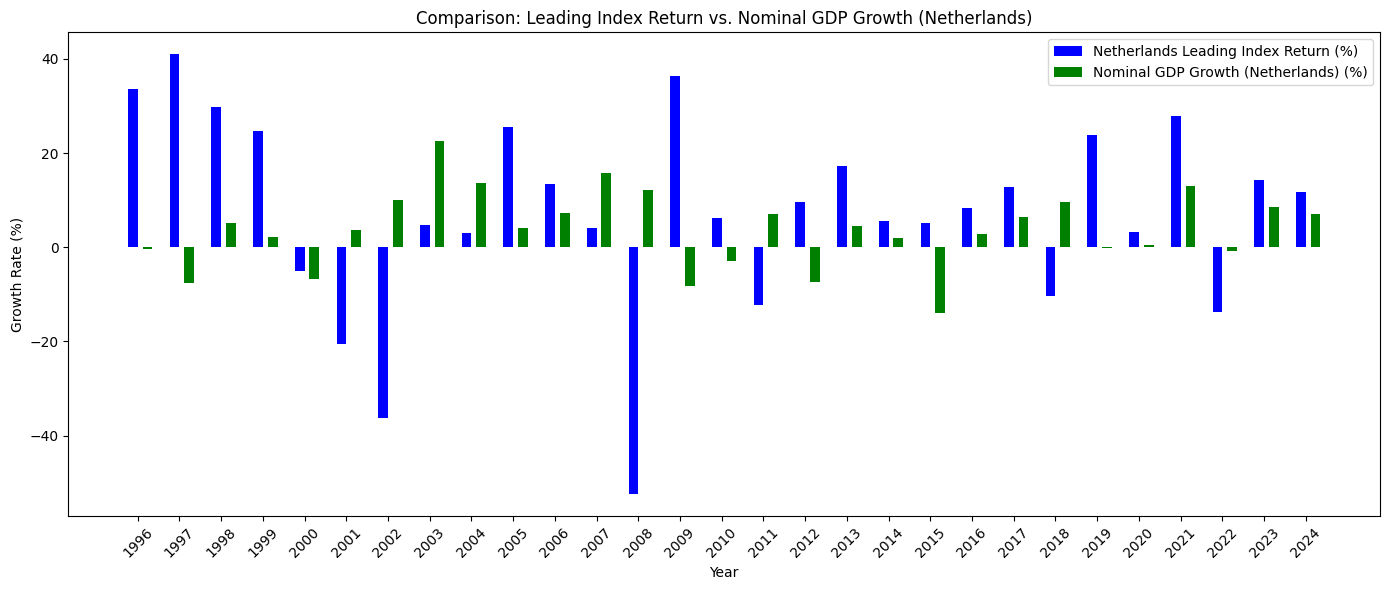

Loading data for Germany...


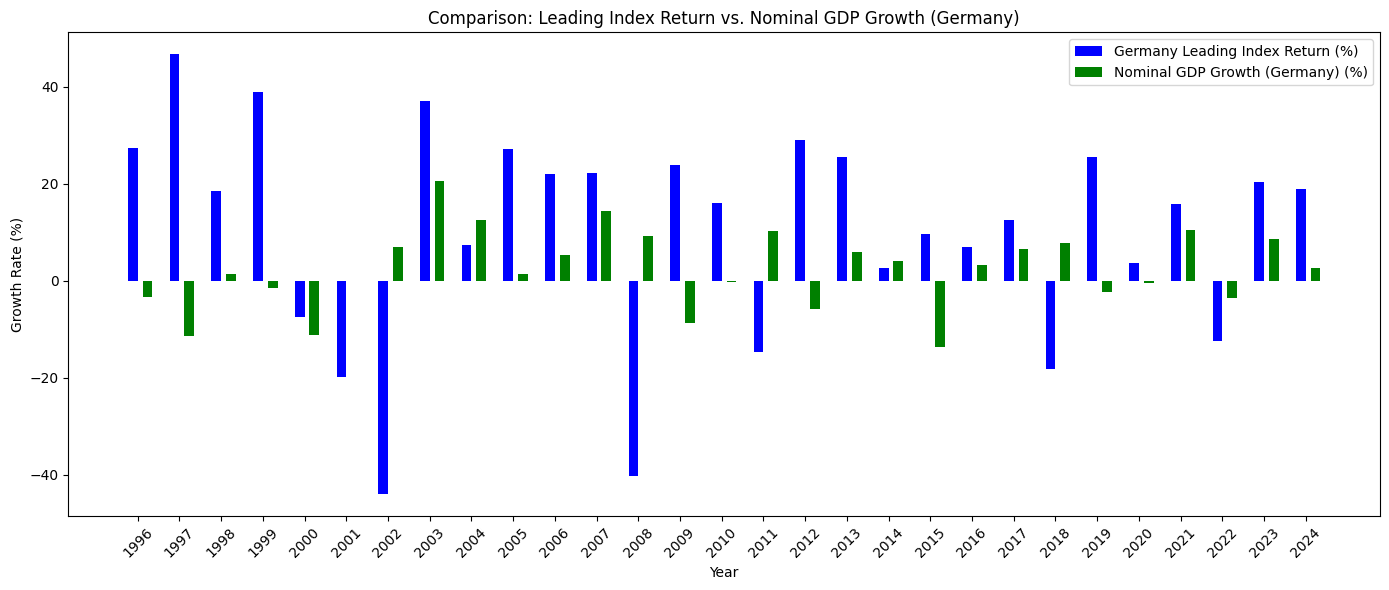

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
import requests
from datetime import datetime

INDEXES = {
    #'USA': '^DJI',
    'NLD': '^AEX',
    'DEU': '^GDAXI',
    #'CHN': '000001.SS',
    #'JPN': '^N225',
    #'GBR': '^FTSE',
    #'FRA': '^FCHI',
    #'WORLD': '^MSCI'
}

COUNTRY_NAMES = {
    #'USA': 'USA',
    'NLD': 'Netherlands',
    'DEU': 'Germany',
    #'CHN': 'China',
    #'JPN': 'Japan',
    #'GBR': 'United Kingdom',
    #'FRA': 'France',
    #'WORLD': 'MSCI World'
}

def get_leading_index(country_code):
    return INDEXES.get(country_code, None)

def get_index_annual_returns(index_symbol, start_year, end_year):
    index = yf.Ticker(index_symbol)
    data = index.history(start=f"{start_year}-01-01", end=f"{end_year}-12-31")
    annual_close = {}
    for date, row in data.iterrows():
        year = date.year
        annual_close[year] = row['Close']
    sorted_years = sorted(annual_close.keys())
    annual_returns = {}
    for i in range(1, len(sorted_years)):
        y = sorted_years[i]
        prev = sorted_years[i-1]
        annual_returns[y] = ((annual_close[y] - annual_close[prev]) / annual_close[prev]) * 100
    return annual_returns

def get_gdp_growth(country_code, start_year, end_year):
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/NY.GDP.MKTP.CD?date={start_year}:{end_year}&format=json"
    response = requests.get(url)
    data = response.json()
    gdp = {int(item['date']): item['value'] for item in data[1] if item['value'] is not None}
    sorted_years = sorted(gdp.keys())
    gdp_growth = {}
    for i in range(1, len(sorted_years)):
        y = sorted_years[i]
        prev = sorted_years[i-1]
        gdp_growth[y] = ((gdp[y] - gdp[prev]) / gdp[prev]) * 100
    return gdp_growth

def plot_comparison(index_growth, gdp_growth, country_name):
    years = sorted(set(index_growth.keys()).intersection(gdp_growth.keys()))
    index_values = [index_growth[y] for y in years]
    gdp_values = [gdp_growth[y] for y in years]

    # Grouped bars
    n_years = len(years)
    width = 0.35
    gap_between_years = 0.5  # Gap between years
    x = []
    for i in range(n_years):
        # Position of the two bars for each year
        x.append(i * (1 + gap_between_years))

    fig, ax = plt.subplots(figsize=(14,6))
    ax.bar(x, index_values, width, label=f'{country_name} Leading Index Return (%)', color='b', align='center')
    ax.bar([p + width for p in x], gdp_values, width, label=f'Nominal GDP Growth ({country_name}) (%)', color='g', align='edge')

    ax.set_xlabel('Year')
    ax.set_ylabel('Growth Rate (%)')
    ax.set_title(f'Comparison: Leading Index Return vs. Nominal GDP Growth ({country_name})')
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(years, rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()

def main():
    start_year = 1995
    end_year = datetime.now().year

    for country_code, index_symbol in INDEXES.items():
        country_name = COUNTRY_NAMES.get(country_code, country_code)
        print(f"Loading data for {country_name}...")
        if not index_symbol:
            print(f"  => No leading index found for {country_name}, skipping.")
            continue
        try:
            index_growth = get_index_annual_returns(index_symbol, start_year, end_year)
            gdp_growth = get_gdp_growth(country_code, start_year, end_year)
            plot_comparison(index_growth, gdp_growth, country_name)
        except Exception as e:
            print(f"  => Error for {country_name}: {e}")

if __name__ == "__main__":
    main()


In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
import requests
from datetime import datetime

INDEXES = {
    'USA': '^DJI',
    'DEU': '^GDAXI',
    'CHN': '000001.SS',
    'JPN': '^N225',
    'GBR': '^FTSE',
    'FRA': '^FCHI',
    'WORLD': None  # MSCI World will be skipped
}

COUNTRY_NAMES = {
    'USA': 'USA',
    'DEU': 'Germany',
    'CHN': 'China',
    'JPN': 'Japan',
    'GBR': 'United Kingdom',
    'FRA': 'France',
    'WORLD': 'MSCI World'
}

INTEREST_RATE_CODES = {
    'USA': 'FEDFUNDS',
    'DEU': 'IR3TIB01DEM156N',
    'CHN': 'IR3TIB01CNM156N',
    'JPN': 'IR3TIB01JPM156N',
    'GBR': 'IR3TIB01GBM156N',
    'FRA': 'IR3TIB01FRM156N',
    'WORLD': None
}

def get_index_annual_returns(index_symbol, start_year, end_year):
    try:
        index = yf.Ticker(index_symbol)
        data = index.history(start=f"{start_year}-01-01", end=f"{end_year}-12-31")
        if data.empty:
            print(f"  => No historical data for {index_symbol}")
            return {}
        annual_close = {}
        for date, row in data.iterrows():
            year = date.year
            annual_close[year] = row['Close']
        sorted_years = sorted(annual_close.keys())
        annual_returns = {}
        for i in range(1, len(sorted_years)):
            y = sorted_years[i]
            prev = sorted_years[i-1]
            annual_returns[y] = ((annual_close[y] - annual_close[prev]) / annual_close[prev]) * 100
        return annual_returns
    except Exception as e:
        print(f"  => Error retrieving index data {index_symbol}: {e}")
        return {}

def get_gdp_growth(country_code, start_year, end_year):
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/NY.GDP.MKTP.CD?date={start_year}:{end_year}&format=json"
    try:
        response = requests.get(url)
        data = response.json()
        if len(data) < 2:
            print(f"  => No GDP data for {country_code}")
            return {}
        gdp = {int(item['date']): item['value'] for item in data[1] if item['value'] is not None}
        sorted_years = sorted(gdp.keys())
        gdp_growth = {}
        for i in range(1, len(sorted_years)):
            y = sorted_years[i]
            prev = sorted_years[i-1]
            gdp_growth[y] = ((gdp[y] - gdp[prev]) / gdp[prev]) * 100
        return gdp_growth
    except Exception as e:
        print(f"  => Error retrieving GDP data for {country_code}: {e}")
        return {}

def get_interest_rate(country_code, start_year, end_year):
    series_code = INTEREST_RATE_CODES.get(country_code)
    if not series_code:
        return {}
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{series_code}?date={start_year}:{end_year}&format=json"
    try:
        response = requests.get(url)
        data = response.json()
        if len(data) < 2:
            print(f"  => No interest rate data for {country_code}")
            return {}
        rates = {int(item['date']): item['value'] for item in data[1] if item['value'] is not None}
        return rates
    except Exception as e:
        print(f"  => Error retrieving interest rate data for {country_code}: {e}")
        return {}

def plot_comparison(index_growth, gdp_growth, interest_rates, country_name):
    years = sorted(set(index_growth.keys()).intersection(gdp_growth.keys()).intersection(interest_rates.keys()))
    if not years:
        print(f"  => No common years for {country_name}, chart will be skipped.")
        return
    index_values = [index_growth[y] for y in years]
    gdp_values = [gdp_growth[y] for y in years]
    rates = [interest_rates[y] for y in years]

    n_years = len(years)
    width = 0.35
    gap_between_years = 0.5
    x = [i * (1 + gap_between_years) for i in range(n_years)]

    fig, ax1 = plt.subplots(figsize=(14,6))

    ax1.bar(x, index_values, width, label=f'{country_name} Leading Index Return (%)', color='b', align='center')
    ax1.bar([p + width for p in x], gdp_values, width, label=f'Nominal GDP Growth (%)', color='g', align='edge')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Return / GDP Growth (%)')
    ax1.set_xticks([p + width/2 for p in x])
    ax1.set_xticklabels(years, rotation=45)

    if rates:
        ax2 = ax1.twinx()
        ax2.plot(x, rates, color='r', marker='o', linestyle='-', label='Interest Rate (%)')
        ax2.set_ylabel('Interest Rate (%)')
        bars_labels = ax1.get_legend_handles_labels()
        line_labels = ax2.get_legend_handles_labels()
        ax1.legend(bars_labels[0] + line_labels[0], bars_labels[1] + line_labels[1], loc='upper left')
    else:
        ax1.legend()

    plt.title(f'Leading Index, GDP Growth and Interest Rate: {country_name}')
    plt.tight_layout()
    plt.show()

def main():
    start_year = 1995
    end_year = datetime.now().year

    for country_code, index_symbol in INDEXES.items():
        country_name = COUNTRY_NAMES.get(country_code, country_code)
        print(f"Loading data for {country_name}...")
        if not index_symbol:
            print(f"  => No leading index found for {country_name}, skipping.")
            continue
        index_growth = get_index_annual_returns(index_symbol, start_year, end_year)
        gdp_growth = get_gdp_growth(country_code, start_year, end_year)
        interest_rates = get_interest_rate(country_code, start_year, end_year)
        plot_comparison(index_growth, gdp_growth, interest_rates, country_name)

if __name__ == "__main__":
    main()


Loading data for USA...
  => No interest rate data for USA
  => No common years for USA, chart will be skipped.
Loading data for Germany...
  => No interest rate data for DEU
  => No common years for Germany, chart will be skipped.
Loading data for China...
  => No interest rate data for CHN
  => No common years for China, chart will be skipped.
Loading data for Japan...
  => No interest rate data for JPN
  => No common years for Japan, chart will be skipped.
Loading data for United Kingdom...
  => No interest rate data for GBR
  => No common years for United Kingdom, chart will be skipped.
Loading data for France...
  => No interest rate data for FRA
  => No common years for France, chart will be skipped.
Loading data for MSCI World...
  => No leading index found for MSCI World, skipping.
